🔍 What is Supervised Learning?
You train a model using labeled data (input → output). 
It learns the mapping and can predict outputs for new inputs.

✅ Key Concepts Checklist for Step 1:

Concept	Why It Matters:

Features (X) & Target (y)	Needed to split data properly
Classification vs Regression	Two major ML problem types
Train-Test Split	To evaluate model on unseen data
Model: LinearRegression, LogisticRegression	Foundation models used everywhere
fit(), predict(), score()	Core ML API workflow

Linear Regression

In [108]:
#🧠 Step-by-step Code: Predict Student Marks from Study Hours (Regression)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Sample Dataset
df = pd.DataFrame({
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Marks_Obtained': [30, 40, 50, 55, 65, 70, 75, 85, 95]
})

# Step 2: Split into X and y
X = df[['Hours_Studied']] #2d dataframe -> [[]] so X capital
y = df['Marks_Obtained']  #1d dataframe -> single value so y small
# print(X), Scikit-learn expects X to be 2D, even if there’s just one feature. So we use double brackets.

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(y_test)
# here test_size=0.2, test data=20% (out of 9 rows, 2 for test, 7 for train). here 1,3,4,5,6,7,9 ae for train 2,8 for test. random state randomly select 2 rows -> detailed below
#📌 This split is essential for real-world ML so we can train on X_train, test on X_test, and avoid overfitting.

# Step 4: Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict and Evaluate
predictions = model.predict(X_test)
print("Predictions:", predictions)
print("Score (R²):", model.score(X_test, y_test)) #model.score gives r2 score for regression, for classification it give accuracy score
#R² (R-squared) = Coefficient of Determination.
# It tells you 'how well your model explains the variation in the data'.
# R^2 = 1- SS_res/SS_tot
# SS_res = Sum of squared residuals (errors)
# SS_tot = Total variance in the data

# 📊 Interpretation:
# R² = 1 → Perfect model
# R² = 0 → Model is as good as predicting the mean
# R² < 0 → Model is worse than mean-based prediction

Predictions: [86.07142857 39.64285714]
Score (R²): 0.998740236835475


✅ What is random_state?
- random_state is a seed value for the random number generator.
- When you do a train_test_split, the rows are shuffled randomly before splitting.

By setting random_state=42 (or any number), you're telling Python:
- “Use the same shuffle pattern every time, so my results are reproducible.”

🧪 Why 42?
- There's nothing magical about 42.
- In ML, people often use 0, 1, or 42 — but you can use any number.

random_state	Seed to fix the randomness

📌 Why is it useful?
Let’s say you're tuning a model: train_test_split(X, y, test_size=0.2)
- If you don’t set random_state, each time you run this, your train/test split is different → model accuracy will vary → makes debugging hard.
- train_test_split(X, y, test_size=0.2, random_state=42). 
You’ll get exactly the same split every time, which is 🔑 for:

Debugging
Comparing models
Sharing results with teammates


3 pillars of every ML model - fit, predict, score

✅ What does .fit(), .predict(), .score() do?
Method	    What it does                            	                            When to use
fit(X, y)	Trains the model on input-output pairs	                                After preparing data
predict(X)	Uses the learned model to make predictions	                            After .fit()
score(X, y)	Returns model accuracy (R² for regression, accuracy for classification)	For evaluation

🎯 Mini Task:
Plot the regression line over the data points.

Predict marks for a student who studied 6.5 hours.

In [109]:
# ✅ Evaluate Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 62.00
MSE: 4328.00
RMSE: 65.79
R² Score: -7.55


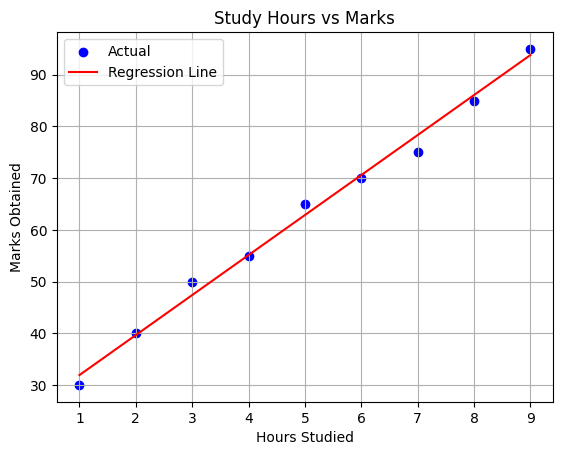

In [112]:
# 🎯 Visualize Regression + Predict for Custom Input
# Plot the regression line
# Predict for a new input (e.g., 6.5 hours studied)
import matplotlib.pyplot as plt

# 1. Plot data points
plt.scatter(X, y, color='blue', label='Actual')
# plt.axhline(0, color='red', linestyle='--')

# 2. Plot regression line
regression_line = model.predict(X)
plt.plot(X, regression_line, color='red', label='Regression Line')

plt.xlabel('Hours Studied')
plt.ylabel('Marks Obtained')
plt.title('Study Hours vs Marks')
plt.legend()
plt.grid(True)
plt.show()

In [113]:
#🔍 Predict for new input (e.g., 6.5 hours)
new_hours = np.array([[6.5]])
predict_hours = model.predict(new_hours)
print(f"predicted marks: {predict_hours[0]:.2f}")


predicted marks: 74.46


c:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Model Evaluation Metrics — these tell you how good your regression model is quantitatively.

In [114]:
#1. Mean Absolute Error (MAE)
# Average absolute difference between predicted and actual values. 
# Lower is better.
from sklearn.metrics import mean_absolute_error
y_pred=predictions

mae = mean_absolute_error(y_test, y_pred)
print("MAE", mae)

MAE 0.7142857142857046


In [115]:
# 2. Mean Squared Error (MSE)
# Average squared difference between predicted and actual values. Penalizes large errors more.
# Lower is better.
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.6377551020407979


In [116]:
# 3. Root Mean Squared Error (RMSE)
# Square root of MSE, interpretable in same units as output.

# rmse = mean_squared_error(y_test, y_pred, squared=False) works in python 3.8-3.11
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 0.7985957062499134


In [117]:
# 4. R-squared (R²)
#               Proportion of variance explained by model (between 0 and 1, closer to 1 is better).
# Should be higher
r2 = model.score(X_test, y_test)
print("R^2:", r2)


R^2: 0.998740236835475


Logistic Regression

🧠 Concept: Classification with Logistic Regression
While linear regression predicts continuous values (e.g., marks),
classification predicts categories/labels (e.g., pass/fail, yes/no, spam/not spam).

🔍 Real-Life Use Case:
Problem: Can we predict whether a student passes or fails
Input: Hours studied
Output: Pass (1) or Fail (0)

In [118]:
import pandas as pd

# Sample dataset
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Passed':        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['Hours_Studied']]
y = df['Passed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(y_test)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Predicted:", y_pred) # 1, 0
print("Actual:", y_test)    # 1, 0


print("Accuracy:", model.score(X_test, y_test))


Predicted: [1 0]
Actual: 8    1
1    0
Name: Passed, dtype: int64
Accuracy: 1.0


🔁 Logistic Regression Curve Visualization
🔍 Intuition:
Logistic regression outputs probabilities between 0 and 1.

At a certain point (called decision boundary, e.g., 0.5), it flips from fail (0) to pass (1).

🧠 Insight:
The curve is S-shaped (sigmoid).

Anything above 0.5 → Class 1 (Pass), below → Class 0 (Fail).

c:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


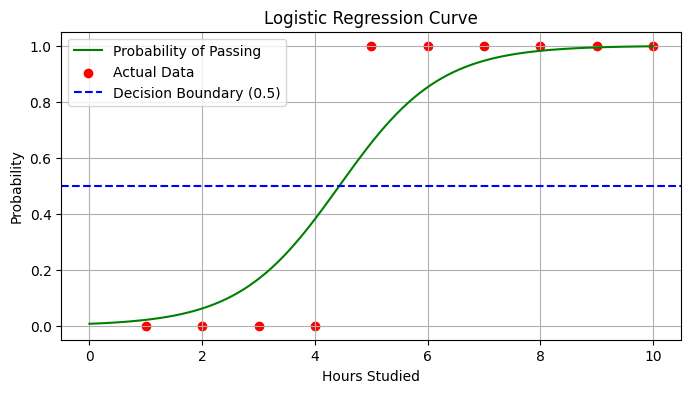

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Generate hours from 0 to 10
X_range = np.linspace(0, 10, 100).reshape(-1, 1)
probs = model.predict_proba(X_range)[:, 1]  # Probability of class "1" (pass)

# Plot
plt.figure(figsize=(8, 4))

plt.plot(X_range, probs, label='Probability of Passing', color='green')
plt.scatter(df['Hours_Studied'], df['Passed'], color='red', label='Actual Data')
plt.axhline(0.5, color='blue', linestyle='--', label='Decision Boundary (0.5)')

plt.xlabel('Hours Studied')
plt.ylabel('Probability')
plt.title('Logistic Regression Curve')
plt.legend()
plt.grid(True)
plt.show()

✅ Mini Task:
Try predicting if a student will pass or fail based on:

2 hours
5 hours
9.5 hours

In [54]:
new_hours= np.array([[9.5]])
output = model.predict(new_hours)
print(f"Student studies for x hours so he {"fails" if output[0] == 0 else "pass"}")

Student studies for x hours so he pass


c:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


🛠️ Mini Project: Titanic Survival Prediction (Logistic Regression)
🎯 Goal: Predict whether a passenger survived based on features like age, sex, class, etc.